In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('..')

import src as sc

# Prepare Campus Data

The cell below can also be carried out in one step by running 
```
> cd src
> python locations.py 
```
from the top level directory.

In [2]:
# One-hot table with halls as rows and schools as columns.
hall_df = sc.get_hall_by_school_table()

# Dataframe with one row per enrolled student.
student_df = sc.get_student_enrollment_data()

# Proportionally assigns students to buildings, writing
# student dataframes to csv as:
#      "../data/filled_buildings/<building_name>_students.csv"

#sc.fill_buildings(student_df = student_df, hall_df = hall_df)


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# Compute Cost & Assignment Matrix

The cell below can also be carried out in one step by running
```
> cd src
> python learning.py "assign_with_downsampling" -1 10 
```
from the top level directory.

In [3]:
# Load mappings
gender_map, race_map, region_map = sc.get_mapping_dicts()

# Load data
hall_df, student_df, art_df = sc.load_data()

# Get quantized student data.
gender_quant_s, race_quant_s, region_quant_s = sc.get_quantized_student_data(    
                                                    student_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)

# Get quantized  art data.
gender_quant_a, race_quant_a, region_quant_a = sc.get_quantized_art_data(    
                                                    art_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)
# Get art_capacity_df
art_capacity_df = sc.get_art_capacity_with_downsampling(art_df,
                    categories = ["gender","race"])
art_capacity_df

,tuple,string,original_index,capacity
0,"(1, 1)","Woman, White",1104,100.0
1,"(1, 2)","Woman, Asian",302,4.0
2,"(1, 3)","Woman, Hispanics of any race",1863,4.0
3,"(1, 4)","Woman, Black or African American",997,7.0
4,"(1, 6)","Woman, American Indian or Alaska Native",1001,15.0
5,"(2, 1)","Man, White",1441,100.0
6,"(2, 2)","Man, Asian",83,35.0
7,"(2, 3)","Man, Hispanics of any race",957,100.0
8,"(2, 4)","Man, Black or African American",1048,54.0
9,"(2, 5)","Man, Two or more races",356,1.0


In [4]:
# Get building_capacity_df.
building_capacity_df = sc.get_building_capacity_df()
building_capacity_df

,capacity
aidekman,222
anderson,2
ballou,36
capen_house,1
clic,1
dental_school,5
eaton_hall,1
fine_arts_house,3
gifford_house,24
goddard_chapel,15


In [5]:
# Compute full n_buildings x n_artworks cost matrix.
cost_df = sc.compute_cost_matrix(art_df = art_df, 
                                    hall_df = hall_df,
                                    categories = ["gender","race"],
                                    alpha = -.00001,
                                    beta = 1000000)

# Reduce cost df to remove duplicate columns.
cost_df = cost_df.rename(columns = {art_capacity_df.loc[i,"tuple"]:art_capacity_df.loc[i,"string"] for i in art_capacity_df.index})

cost_df

aidekman
(5911, 2)
[[1 1]]
anderson
(7611, 2)
[[1 1]]
ballou
(6033, 2)
[[1 1]]
capen_house
(26, 2)
[[1. 4.]]
clic
(7611, 2)
[[1 1]]
dental_school
(1052, 2)
[[1 1]]
eaton_hall
(5667, 2)
[[1 1]]
fine_arts_house
(6107, 2)
[[1 1]]
gifford_house
(366, 2)
[[1 1]]
goddard_chapel
(366, 2)
[[1 1]]
goddard_hall
(618, 2)
[[1 1]]
granoff_fam_hillel_center
(122, 2)
[[1 1]]
granoff_music_bld
(6033, 2)
[[1 1]]
houston_hall
(5808, 2)
[[1 1]]
jean_mayer_hnra_center
(1883, 2)
[[1 1]]
lane_hall
(5667, 2)
[[1 1]]
miner_hall
(5667, 2)
[[1 1]]
packard_hall
(5667, 2)
[[1 1]]
smfa
(436, 2)
[[1 1]]
sophia_gordon_hall
(256, 2)
[[1 1]]
tisch_library
(244, 2)
[[1 1]]
univ_advancement
(6114, 2)
[[1 1]]


,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,0.254329,0.0,0.0,0.0,0.202619,0.200061,0.00018,0.058715,0.047006,0.0,0.237089
anderson,0.269511,0.0,0.0,0.0,0.173243,0.239527,0.000029,0.038542,0.027019,0.0,0.252129
ballou,0.260563,0.0,0.0,0.0,0.207831,0.203775,0.000126,0.056064,0.045068,0.0,0.226574
capen_house,0.099955,0.099955,0.099955,0.099955,0.099955,0.099955,0.099955,0.099955,0.099955,0.000453,0.099955
clic,0.269511,0.0,0.0,0.0,0.173243,0.239527,0.000029,0.038542,0.027019,0.0,0.252129
dental_school,0.173267,0.000932,0.01986,0.001953,0.148873,0.167218,0.051418,0.14493,0.126654,0.000001,0.164892
eaton_hall,0.251915,0.0,0.0,0.0,0.200586,0.200184,0.000247,0.060709,0.051547,0.0,0.234811
fine_arts_house,0.269224,0.0,0.0,0.0,0.171789,0.19945,0.000204,0.058696,0.049738,0.0,0.250898
gifford_house,0.136946,0.001295,0.077192,0.041526,0.136946,0.135788,0.086951,0.12456,0.126081,0.000118,0.132597
goddard_chapel,0.1402,0.003287,0.064963,0.046769,0.1402,0.138532,0.082961,0.127216,0.120304,0.000003,0.135568


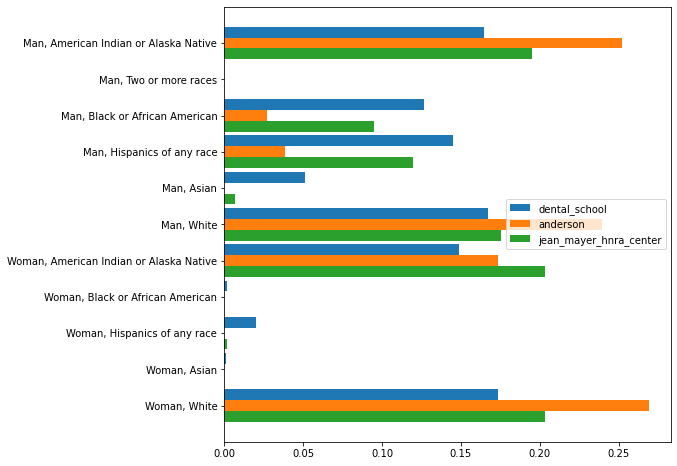

In [6]:
fig, ax = plt.subplots(figsize = (8,8))
height = 0.3
offset = .3
for i in ["dental_school","anderson","jean_mayer_hnra_center"]:
    ax.barh(y = [j + offset for j in range(cost_df.shape[1])],
            width = cost_df.loc[i,:].values, 
            label = i,
            height = height)
    offset += -0.3
    

ax.set_yticks([j for j in range(art_capacity_df.shape[0])])
ax.set_yticklabels(art_capacity_df["string"])
plt.legend()
plt.show()

In [7]:
A = np.array([0,1])
A

array([0, 1])

In [8]:
A.reshape(-1,2)

array([[0, 1]])

In [9]:
assignment_df = sc.learn_optimal_assignment(cost_df, 
                             building_capacity_df, 
                             art_capacity_df, 
                             lam = 100) # lambda, you can change this.

# Convert the assignment array to a dataframe for readability.
# assignment_df = pd.DataFrame(P, index = cost_df.index,
#                   columns = art_capacity_df["string"].values)
assignment_df

,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,50.506516,2.040089,2.060368,3.582346,7.518917,50.548996,17.864028,50.655551,27.516963,0.178431,9.527795
anderson,0.452918,0.018202,0.019273,0.032511,0.067265,0.452976,0.160204,0.458454,0.246773,0.00873,0.082693
ballou,8.179551,0.328005,0.340879,0.581775,1.193374,8.196162,2.880421,8.239045,4.428618,0.112934,1.519236
capen_house,0.230144,0.00693,0.007464,0.014085,0.035232,0.229521,0.077941,0.227888,0.121818,0.004315,0.044663
clic,0.226458,0.009103,0.009637,0.016258,0.033639,0.226487,0.080113,0.229223,0.123404,0.004325,0.041354
dental_school,1.142829,0.045381,0.046004,0.081024,0.170705,1.140387,0.394718,1.134697,0.605783,0.022386,0.216086
eaton_hall,0.226841,0.009103,0.009637,0.016258,0.033044,0.227342,0.080109,0.228741,0.12287,0.004325,0.041731
fine_arts_house,0.679401,0.027299,0.028907,0.04876,0.100972,0.682087,0.240259,0.686384,0.36862,0.013215,0.124096
gifford_house,5.504264,0.217711,0.194607,0.369951,0.822852,5.49245,1.880216,5.465165,2.912355,0.090661,1.049769
goddard_chapel,3.427451,0.134698,0.123132,0.227604,0.511763,3.419252,1.168609,3.399973,1.811048,0.12275,0.653721


# Create Heatmap Visualization

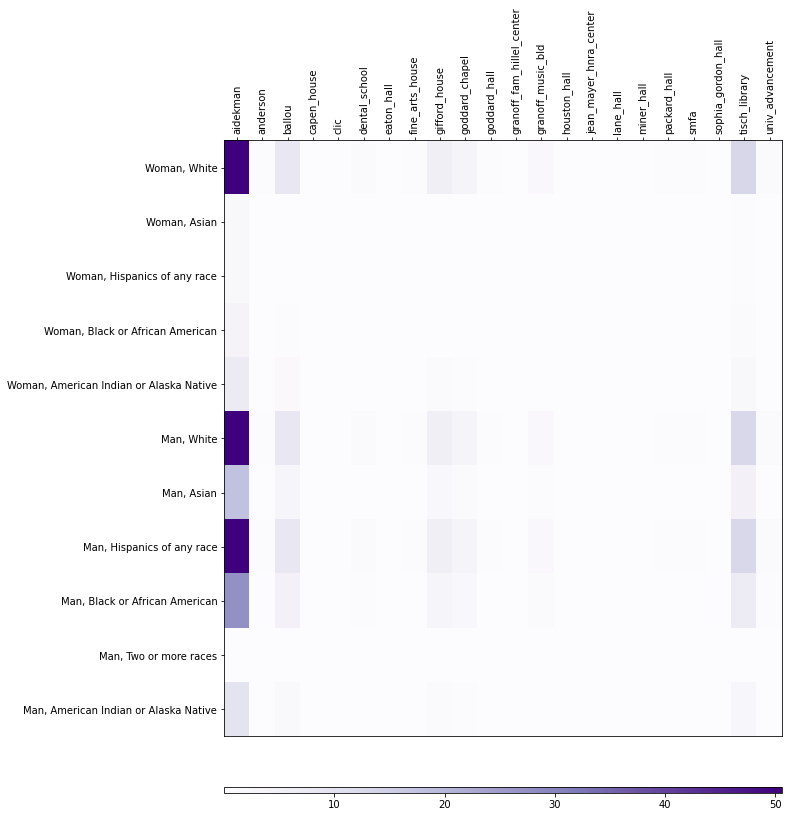

In [10]:
clipped_assignment_df = assignment_df.clip(upper = 1)
sc.assignment_heatmat(assignment_df)

## Validation

In [11]:
sc.baseline_average_value(category = "gender", in_group = "Man")

(12.420142531775767, 2.4564820584150477)

In [12]:
sc.optimized_average_value(assignment_df, category = "gender", in_group = "Man")

(10.478250025886721, 4.385910547408535)

In [13]:
sc.baseline_average_value(category = "race", in_group = "White")

(13.369121490307114, 1.5993379546169388)

In [16]:
sc.optimized_average_value(assignment_df, category = "race", in_group = "White")

(7.012137524868274, 7.831208400136673)